# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Viral Shorts Reels Performance Dataset](https://www.kaggle.com/datasets/prince7489/viral-shorts-and-reels-performance-analytics-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

## Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

/kaggle/input/bmw-global-sales-and-market-data/bmw_global_sales_dataset.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('bmw_global_sales_dataset.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,year,month,country,model,segment,engine_type,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,units_sold
0,2021,1,Australia,X1,SUV,Petrol,82234,315372,96,0.97,6.29,1.2,8,324
1,2018,8,Australia,i4,Sedan,Electric,82291,447798,234,0.97,6.29,1.2,7,556
2,2022,12,USA,5 Series,Electric,Hybrid,40594,259755,25,0.97,6.29,1.2,7,152
3,2019,11,Australia,i7,SUV,Electric,42371,323541,319,0.97,6.29,1.2,5,730
4,2021,12,Brazil,X5,SUV,Diesel,82315,482015,367,0.97,6.29,1.2,2,1156


## last Five row

In [4]:
df.tail()

,year,month,country,model,segment,engine_type,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,units_sold
995,2024,10,UK,i4,Sedan,Electric,64813,126425,177,0.97,6.29,1.2,1,570
996,2024,2,India,3 Series,Sedan,Petrol,119431,473502,56,0.97,6.29,1.2,7,433
997,2022,2,Brazil,5 Series,SUV,Electric,100679,65994,212,0.97,6.29,1.2,1,614
998,2016,1,Brazil,i7,Sedan,Hybrid,45681,161915,223,0.97,6.29,1.2,9,511
999,2023,10,China,7 Series,Sedan,Petrol,107903,435105,255,0.97,6.29,1.2,1,891


## Shape of our dataset

In [5]:
df.shape

(1000, 14)

## List out all columns

In [6]:
df.columns

Index(['year', 'month', 'country', 'model', 'segment', 'engine_type',
       'price_usd', 'marketing_spend_usd', 'dealership_count',
       'fuel_price_usd', 'gdp_growth_percent', 'interest_rate_percent',
       'competition_index', 'units_sold'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

year                       int64
month                      int64
country                   object
model                     object
segment                   object
engine_type               object
price_usd                  int64
marketing_spend_usd        int64
dealership_count           int64
fuel_price_usd           float64
gdp_growth_percent       float64
interest_rate_percent    float64
competition_index          int64
units_sold                 int64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1000 non-null   int64  
 1   month                  1000 non-null   int64  
 2   country                1000 non-null   object 
 3   model                  1000 non-null   object 
 4   segment                1000 non-null   object 
 5   engine_type            1000 non-null   object 
 6   price_usd              1000 non-null   int64  
 7   marketing_spend_usd    1000 non-null   int64  
 8   dealership_count       1000 non-null   int64  
 9   fuel_price_usd         1000 non-null   float64
 10  gdp_growth_percent     1000 non-null   float64
 11  interest_rate_percent  1000 non-null   float64
 12  competition_index      1000 non-null   int64  
 13  units_sold             1000 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 109.5+ K

## Check Null Value

In [9]:
df.isnull().sum()

year                     0
month                    0
country                  0
model                    0
segment                  0
engine_type              0
price_usd                0
marketing_spend_usd      0
dealership_count         0
fuel_price_usd           0
gdp_growth_percent       0
interest_rate_percent    0
competition_index        0
units_sold               0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,year,month,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,units_sold
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,2019.448000,6.487000,76535.747000,279492.230000,200.230000,9.700000e-01,6.290000e+00,1.200000e+00,5.572000,633.192000
std,2.912005,3.510863,25360.933749,127010.559722,113.096127,1.977186e-14,3.199042e-14,2.265988e-14,2.944059,263.346628
min,2015.000000,1.000000,35060.000000,50363.000000,10.000000,9.700000e-01,6.290000e+00,1.200000e+00,1.000000,15.000000
25%,2017.000000,3.000000,54578.750000,173552.250000,101.750000,9.700000e-01,6.290000e+00,1.200000e+00,3.000000,432.750000
50%,2019.000000,7.000000,75726.000000,278733.500000,197.000000,9.700000e-01,6.290000e+00,1.200000e+00,6.000000,630.000000
75%,2022.000000,10.000000,98730.250000,390110.000000,297.000000,9.700000e-01,6.290000e+00,1.200000e+00,8.000000,842.500000
max,2024.000000,12.000000,119817.000000,498927.000000,399.000000,9.700000e-01,6.290000e+00,1.200000e+00,10.000000,1242.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

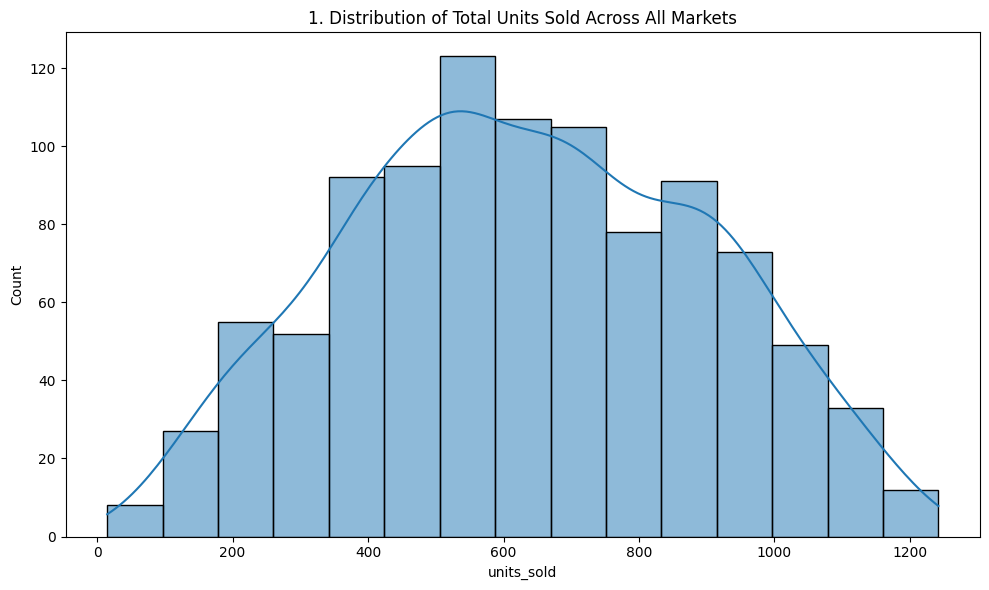

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['units_sold'], kde=True)
plt.title(f'{plot_no}. Distribution of Total Units Sold Across All Markets')
show_fig()
plot_no += 1

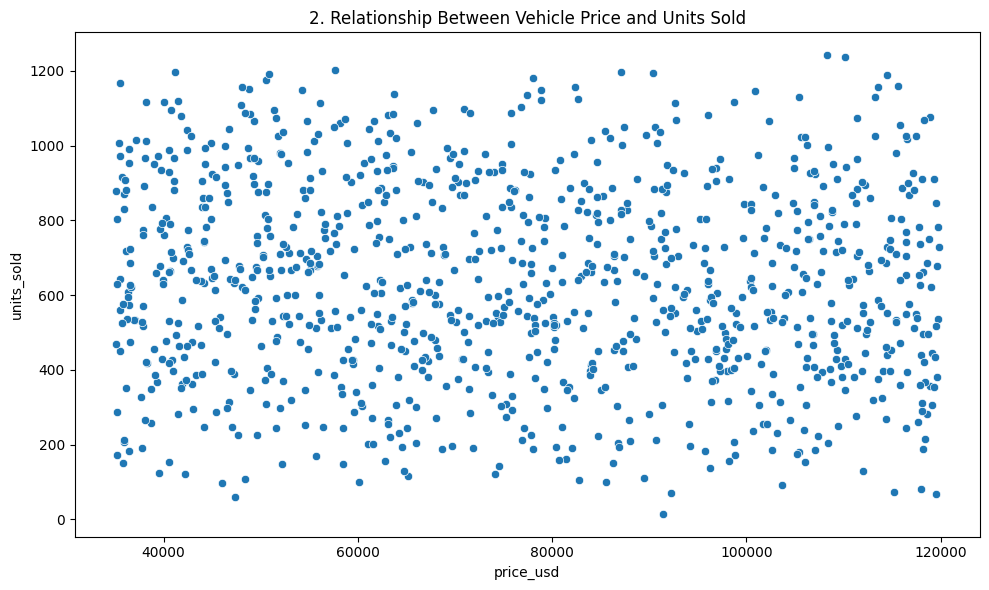

In [14]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price_usd', y='units_sold')
plt.title(f'{plot_no}. Relationship Between Vehicle Price and Units Sold')
show_fig()
plot_no += 1

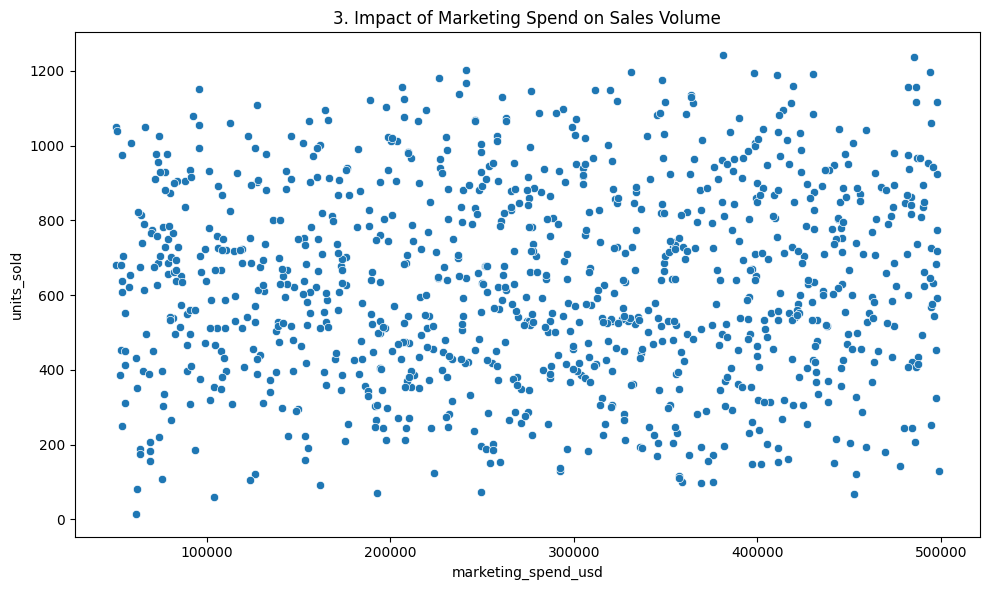

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='marketing_spend_usd', y='units_sold')
plt.title(f'{plot_no}. Impact of Marketing Spend on Sales Volume')
show_fig()
plot_no += 1

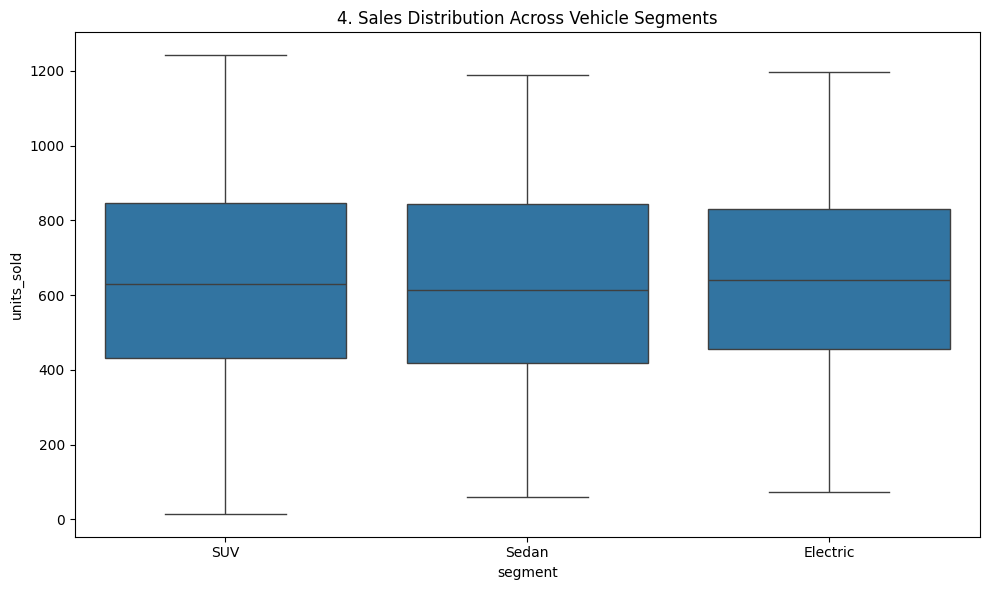

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='segment', y='units_sold')
plt.title(f'{plot_no}. Sales Distribution Across Vehicle Segments')
show_fig()
plot_no += 1

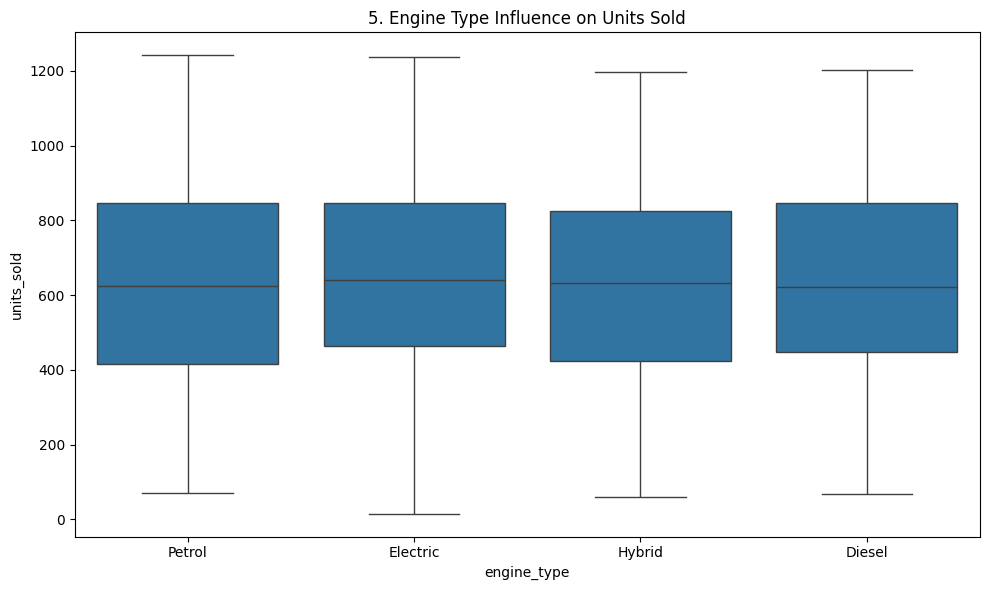

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='engine_type', y='units_sold')
plt.title(f'{plot_no}. Engine Type Influence on Units Sold')
show_fig()
plot_no += 1

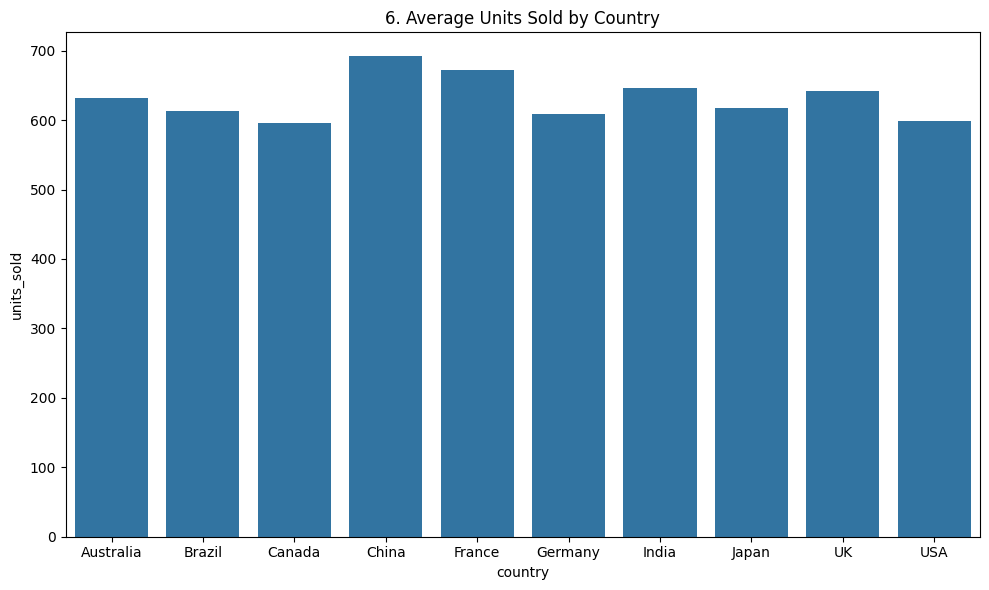

In [18]:
fig = plt.figure(figsize=(10,6))
country_sales = df.groupby('country')['units_sold'].mean().reset_index()
sns.barplot(data=country_sales, x='country', y='units_sold')
plt.title(f'{plot_no}. Average Units Sold by Country')
show_fig()
plot_no += 1

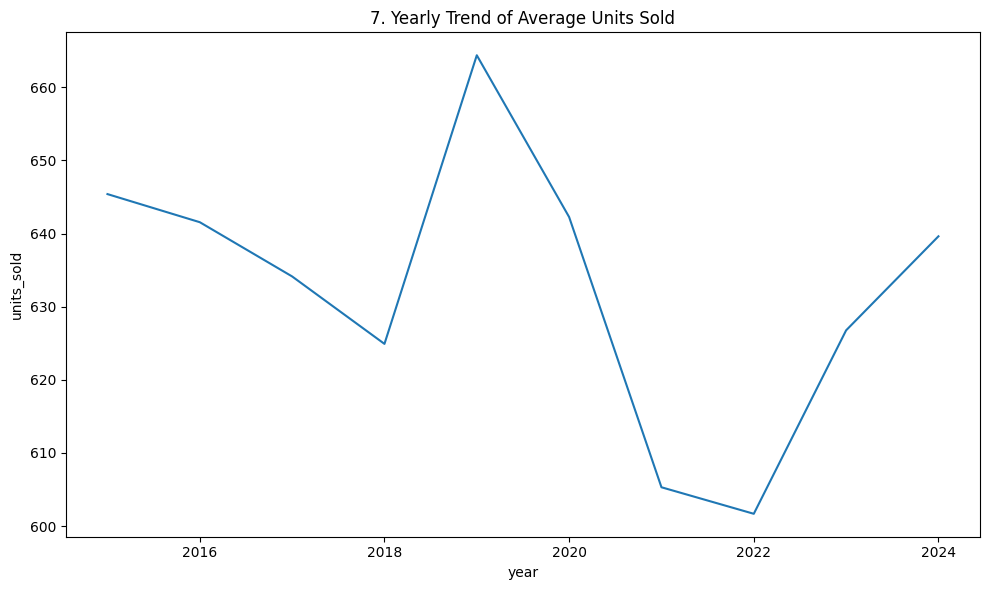

In [19]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('year')['units_sold'].mean().reset_index(), x='year', y='units_sold')
plt.title(f'{plot_no}. Yearly Trend of Average Units Sold')
show_fig()
plot_no += 1

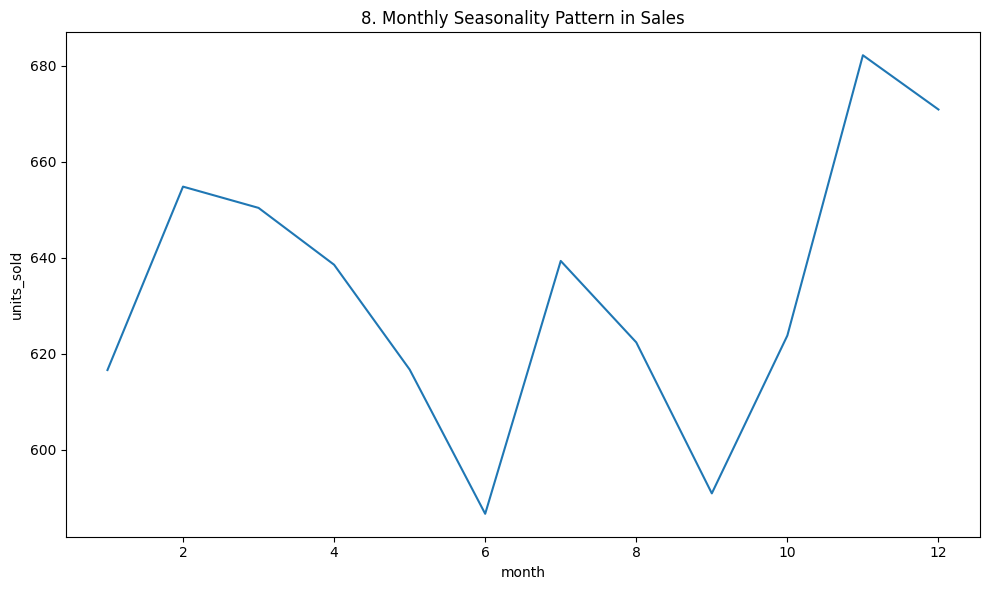

In [20]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('month')['units_sold'].mean().reset_index(), x='month', y='units_sold')
plt.title(f'{plot_no}. Monthly Seasonality Pattern in Sales')
show_fig()
plot_no += 1

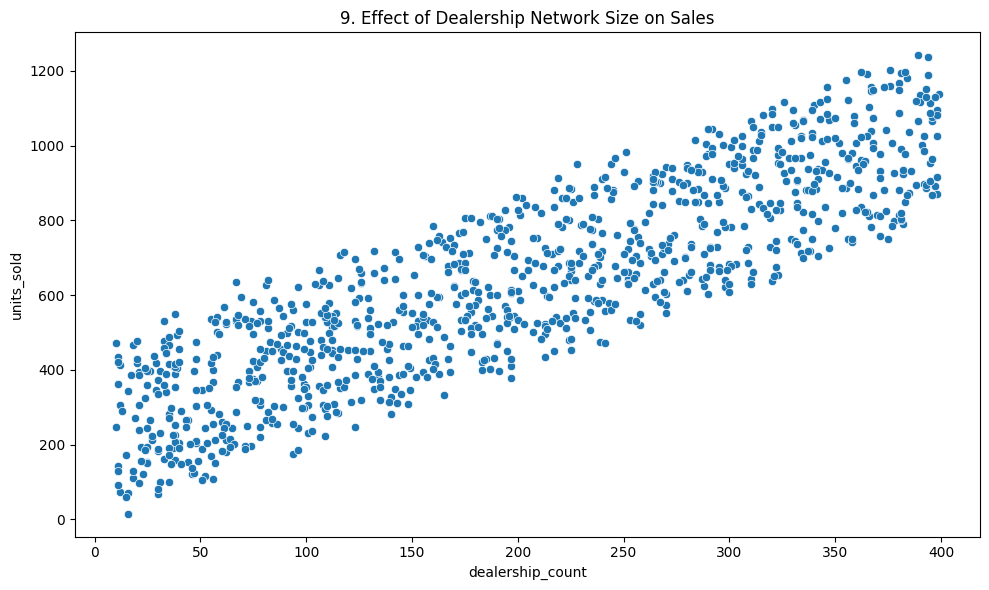

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='dealership_count', y='units_sold')
plt.title(f'{plot_no}. Effect of Dealership Network Size on Sales')
show_fig()
plot_no += 1

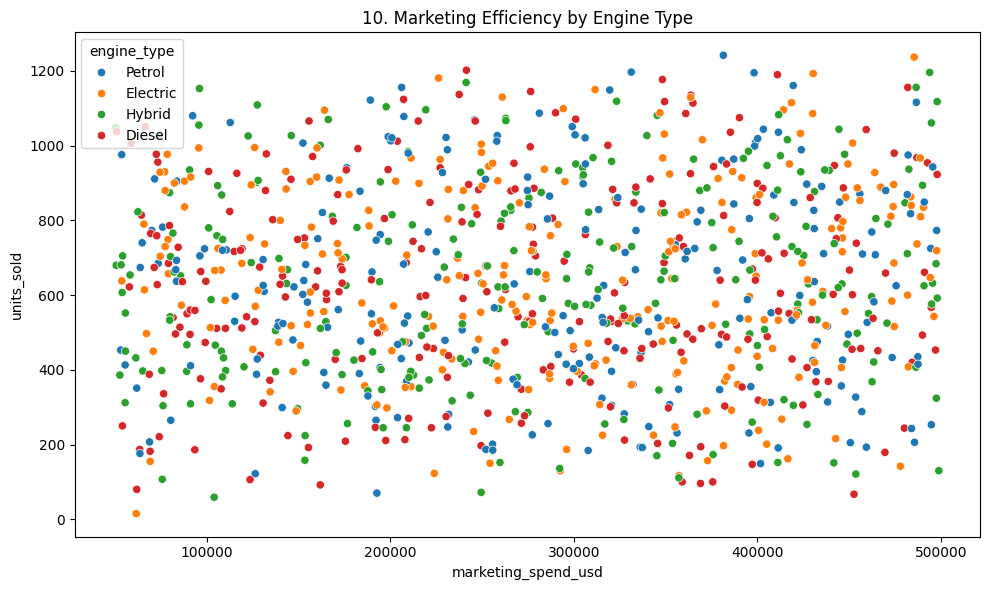

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='marketing_spend_usd', y='units_sold', hue='engine_type')
plt.title(f'{plot_no}. Marketing Efficiency by Engine Type')
show_fig()
plot_no += 1

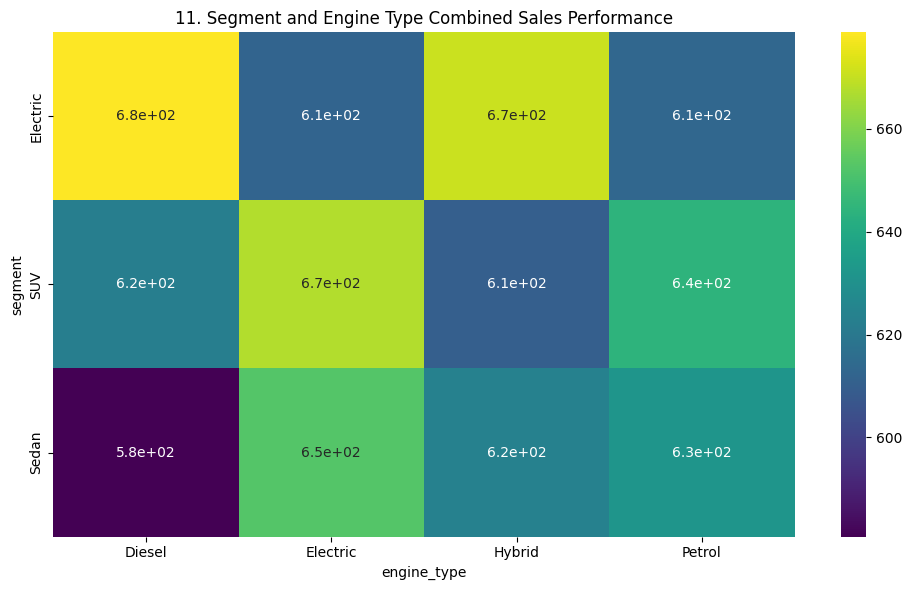

In [23]:
fig = plt.figure(figsize=(10,6))
pivot_data = df.pivot_table(values='units_sold', index='segment', columns='engine_type', aggfunc='mean')
sns.heatmap(pivot_data, annot=True, cmap='viridis')
plt.title(f'{plot_no}. Segment and Engine Type Combined Sales Performance')
show_fig()
plot_no += 1

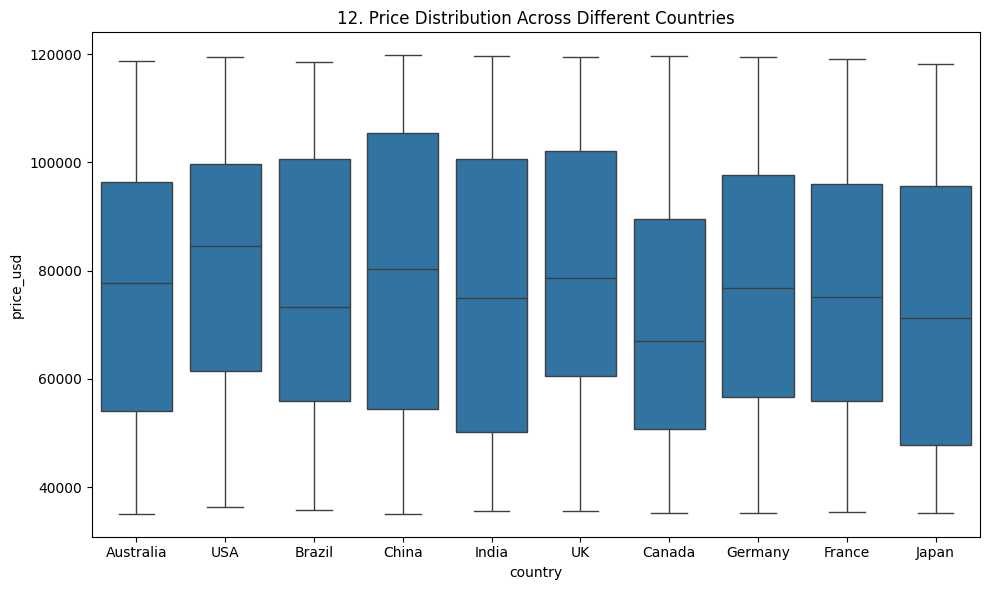

In [24]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='country', y='price_usd')
plt.title(f'{plot_no}. Price Distribution Across Different Countries')
show_fig()
plot_no += 1

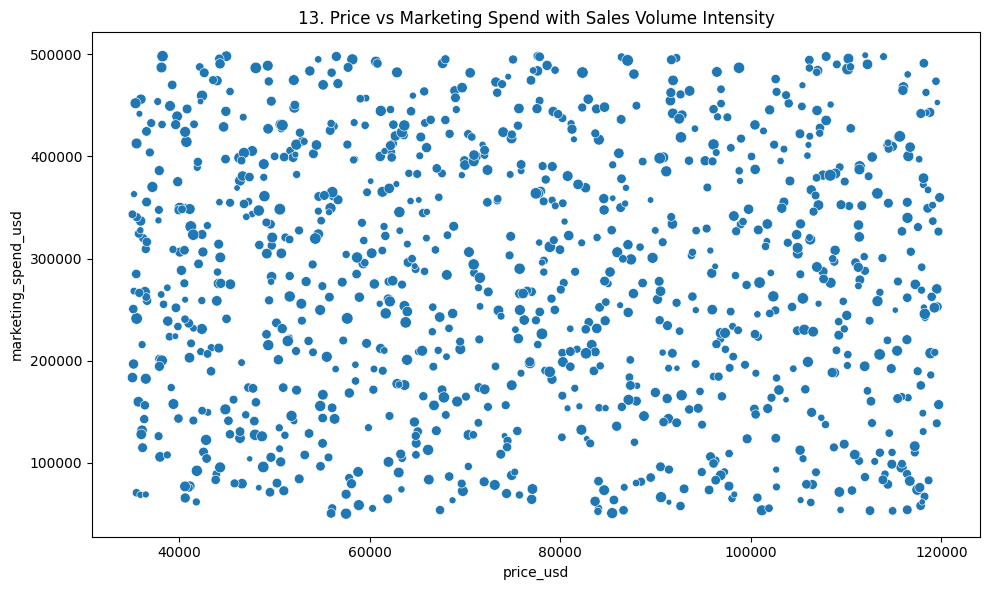

In [25]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price_usd', y='marketing_spend_usd', size='units_sold', legend=False)
plt.title(f'{plot_no}. Price vs Marketing Spend with Sales Volume Intensity')
show_fig()
plot_no += 1

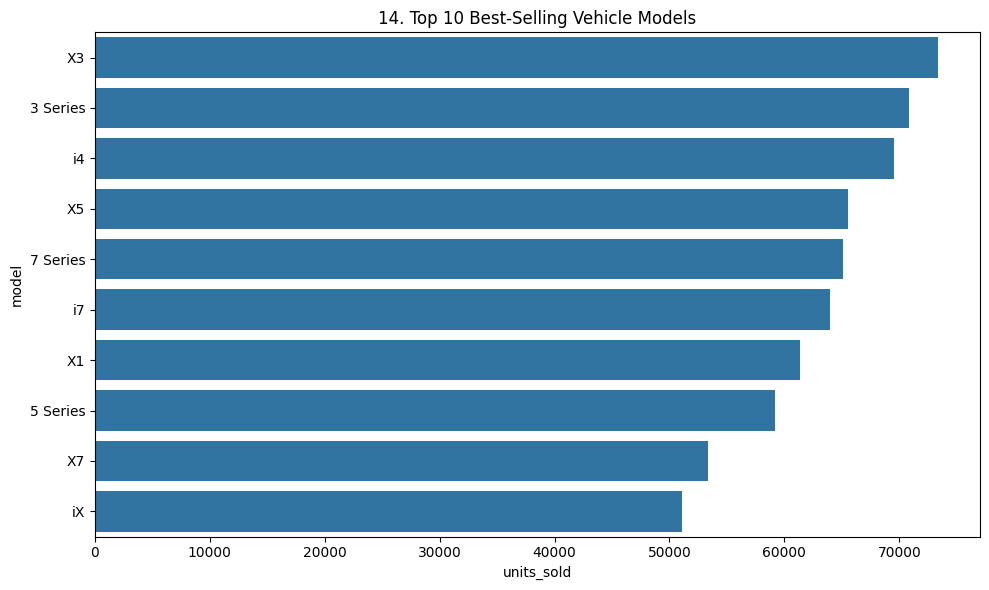

In [26]:
fig = plt.figure(figsize=(10,6))
top_models = df.groupby('model')['units_sold'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_models, x='units_sold', y='model')
plt.title(f'{plot_no}. Top 10 Best-Selling Vehicle Models')
show_fig()
plot_no += 1

# Model Training

## Create target variable by converting units_sold into High(1) and Low(0) sales

In [27]:
df['high_sales'] = (df['units_sold'] > df['units_sold'].median()).astype(int)

## Define features and target

In [28]:
X = df.drop(['units_sold', 'high_sales'], axis=1)
y = df['high_sales']

## Identify categorical and numerical columns

In [29]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

## Create preprocessing pipeline (OneHotEncoding + Scaling)

In [30]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

## Create full pipeline with Logistic Regression classifier

In [31]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

## Split data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [33]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['year', 'month', 'price_usd', 'marketing_spend_usd', 'dealership_count',
       'fuel_price_usd', 'gdp_growth_percent', 'interest_rate_percent',
       'competition_index'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['country', 'model', 'segment', 'engine_type'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Make predictions

In [34]:
y_pred = model.predict(X_test)

## Print accuracy score

In [35]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.84


## Plot confusion matrix

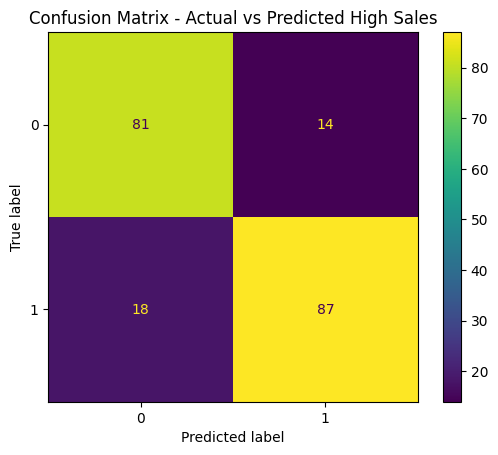

In [36]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Actual vs Predicted High Sales")
plt.show()